<a href="https://colab.research.google.com/github/emmitds/Econometrie/blob/master/Projet_econo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet d'économétrie : le modèle création-destruction d' Aghion et d'Howitt


### **<span style='color:blue'>Fait par E. Todosijevic et Cherine Rhellab</span>**

Le modèle d'Aghion et Howitt constitue une approche de croissance économique basée sur le processus schumpétérien de création et destruction. Selon ce modèle, la croissance économique est exclusivement permise par le progrès technique, résultant de la compétition entre les entreprises engagées dans la recherche et l'innovation.

Chaque innovation se traduit par un nouveau bien intermédiaire qui permet une production plus efficace que ce qui etait permis auparavant. Les firmes qui font de la recherche sont motivées par la possibilité de générer une rente de monopole si la recherche est brevetée. Ces rentes seront à leur tour détruites par une autre innovation.

Dans le cadre de ce modèle, à chaque période un ou une entrepreneur a l’opportunité de mener un projet de recherche pour innover. La probabilité de succès à chaque période est alors notée :

$$\mu_t = \lambda \left( \frac{R}{\gamma A_{t-1}} \right)^{\sigma}$$

avec $R$ les dépenses de R&D et $A_{t-1}$ la productivité totale des facteurs à la période précédente

Quand le projet de recherche réussi, il donne lieu à une innovation drastique: le nouveau bien intermédiaire résultant de cette innovation remplace l'ancien. (Exemple : télévisions noire et blanc VS télévision en couleur).

Dans cette dynamique, les emplois associés à la production de l'ancien bien intermédiaire peuvent être affectés de manière négative, voire supprimés, car l'innovation rend l'ancienne technologie obsolète. Cependant, parallèlement à cette destruction d'emplois, l'innovation ouvre la voie à la création de nouveaux emplois dans les secteurs liés à la production du nouveau bien intermédiaire.

Partant de cette idée, nous voulons voir comment cette théorie fonctionne dans la réalité en utilisant des données concrètes.
Pour cela, nous allons utiliser 3 séries temporelles:

Le **chômage** aux Etats-Unis entre 1970 et 2021, permettant de rendre compte de la potentielle création ou destruction d'emploi, qui serait-elle même expliquée par :

Les **dépenses de R&D** aux Etats-Unis entre 1970 et 2021, qui participent à augmenter la probabilité d'innovation et donc de destruction d'emploi, mais aussi,

La **productivité du travail** aux Etats-Unis entre 1970 et 2021, qui participe à diminuer la probabilité d'innovation de la *période suivante*.

## Importation et visualisation des données

Pour commencer, nous allons charger les packages dont nous avons besoin pour réaliser ce projet. Veuillez noter que dans notre cas, ces derniers sont déjà installés. Si ce n'est pas votre cas, veuillez faire tourner la ligne de code commençant par un #.

In [2]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("urca")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library("readxl")
library("ggplot2")
library("stats")
library("urca")

Maintenant, il convient d'importer la base de données, qui se trouve dans un fichier Excel et l'affecter à "Base".

*Attention, dans la légende, il est écrit que le chômage et les dépenses de R&D sont en %, ce qui ne sera pas le cas dans notre data frame afin de pouvoir log-linéariser nos données.*

In [19]:
Base <- read_excel("C:/Users/emmit/OneDrive/Bureau/Projet econo M1/BaseDonnées.xlsx",sheet = "Jointure des bases de données")

ERROR: ignored

Afin de mieux visualiser notre base de données, nous allons la convertir en un DataFrame.

In [ ]:
Base <- as.data.frame(Base)

On décomposes notre data frame pour avoir un data frame par série temporelle.

In [ ]:
chômage = Base$`Chômage aux Etats-Unis (en % du PIB, moyenne du chômage trimestriel)`
dépenses = Base$`Dépenses en R&D (en % du PIB) des Etats Unis`
productivité <- Base$`Productivité du travail (PIB par heure travaillée) des Etats Unis`

data_chômage <- data.frame(dates = Base$Dates,chômage)

data_dépenses <- data.frame(dates = Base$Dates,dépenses)

data_productivité <- data.frame(dates = Base$Dates,productivité)

## Représentations graphiques, autocorrélogrammes simples et autocorrélogrammes partiels par séries

### 1. Le chômage aux Etats-Unis entre 1970 et 2021

<span style="color:black;"><ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour réduire l'hétéroscédasticité. </span>

In [ ]:
chômage$logPIB <- log(chômage)

Warning message in chômage$logPIB <- log(chômage):
"Conversion automatique de LHS en liste"

Création d'un data frame avec le chômage et les dates pour faciliter la construction du graphique.

In [ ]:
data_chômagelog <- data.frame(dates = Base$Dates,chômage$logPIB)

### Représentation graphique

<ins>Etape préliminaire</ins> : ajustement de la taille des graphiques

In [ ]:
options(repr.plot.width = 4, repr.plot.height = 4)

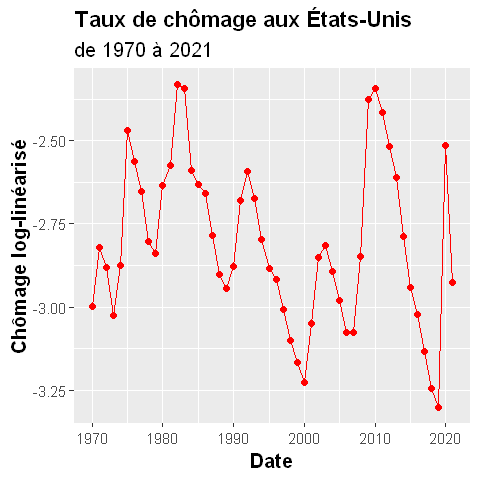

In [ ]:
p_chomage <- ggplot(data = data_chômagelog, aes(x = dates, y = chômage$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Taux de chômage') +
  labs(y = "Chômage log-linéarisé", title = "Taux de chômage aux États-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_chomage)


<span style="color:purple;">**<ins>Commentaire<ins>** :

<span style="color:purple;">Le taux de chômage aux Etats-Unis connait des fortes fluctuations sur la période estimée. De manière plus précise, le chômage évolue de manière cyclique : il atteint des niveaux relativement hauts pendant les périodes de crises économiques (1973 - choc pétrolier, 2000 - bulle internet, 2008 - Subprimes et 2020 - COVID19) puis redescend en période de reprise et de croissance.</span>
    
<span style="color:purple;"> Par exemple, pendant la crise de 2008, les entreprises, confrontées à des conditions économiques difficiles, ont réagi en réduisant leurs effectifs pour faire face à la baisse de la demande et à l'incertitude financière.Le secteur financier a été particulièrement touché, avec des faillites bancaires et des pertes massives, entraînant des suppressions d'emplois dans ce secteur.</span>
    
<span style="color:purple;">A première vue, la moyenne de la série semble constante au fil du temps, cela suggère une stationnarité en moyenne. Néanmoins les fluctuations de la série connaissent des amplitudes différentes ce qui suggère une non-stationnarité en variance.</span>

<span style="color:purple;">Par conséquent, il est difficile de se prononcer sur la stationnarité de la série.</span>

### Autocorrélogramme simple

Afin de réussir à faire un autocorrélogramme, on converti la liste "chômage" en un vecteur numérique puis en un objet de type série temporelle.

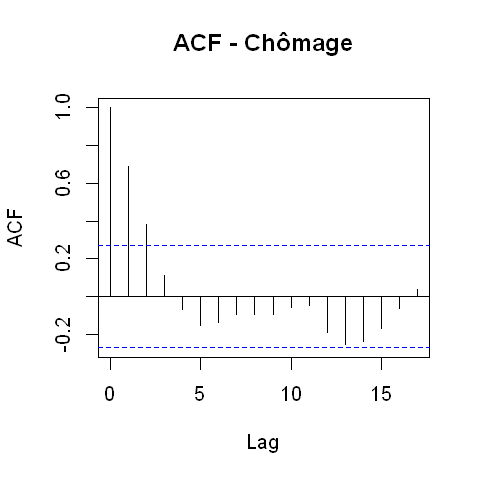

In [ ]:
acf_chômage <- acf(data_chômage$chômage, main = "ACF - Chômage")

<span style="color:green;">**<ins>Commentaire<ins>** : Les autocorrélations sont significatives et décroissantes jusqu'au retard 3. </span>

###  Autocorrélogramme partiel

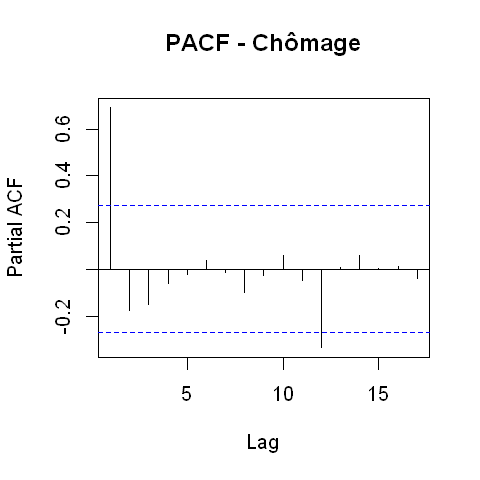

In [ ]:
pacf_chômage <- pacf(data_chômage$chômage, main = "PACF - Chômage")

<span style="color:green;">**<ins>Commentaire<ins>** : Aucune autocorrélation partielle n'est significativement différente de 0.</span>

 ### 2. Les dépenses de R&D aux Etats-Unis de 1970 à 2021

<ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour

In [ ]:
dépenses$logPIB <- log(dépenses)

Warning message in dépenses$logPIB <- log(dépenses):
"Conversion automatique de LHS en liste"

Création d'un data frame avec le chômage et les dates pour faciliter la construction du graphique.

In [ ]:
data <- data.frame(
  dates = Base$Dates,
  dépenses$logPIB
)

#### Affichage du graphique

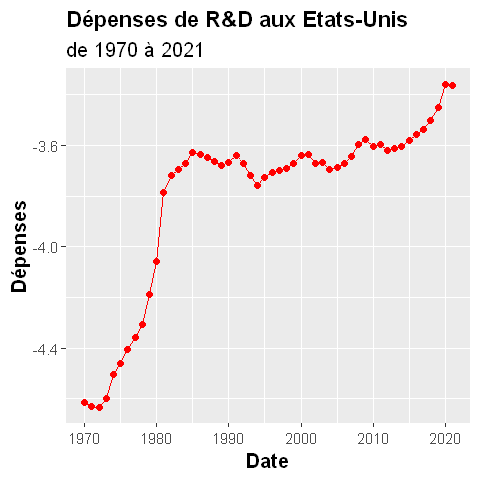

In [ ]:
p_dépenses <- ggplot(data = data, aes(x = dates, y = dépenses$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Dépenses de R&D') +
  labs(y = "Dépenses", title = "Dépenses de R&D aux Etats-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_dépenses)


<span style="color:purple;">**<ins>Commentaire<ins>** :

<span style="color:purple;">Les dépenses de R&D aux Etats-Unis ont une allure globalement croissante sur la période estimée. On peut découper la série en deux périodes :</span>
    
<span style="color:purple;"> **1) 1970 - 1985 : Forte croissance des dépenses de R&D**</span><br>
<span style="color:purple;">Augmentation significative des dépenses de R&D aux États-Unis expliquées par des avancées technologiques significatives telles que l'émergence de l'industrie des logiciels (création de Microsoft en 1975) et la naissance de l'industrie du jeu vidéo (Pong en 1972, qui est un des premiers jeux vidéo d'arcade).</span>
    
<span style="color:purple;"> **2) 1985 - 2021 : Ralentissement de la croissance des dépenses de R&D** </span><br>
<span style="color:purple;">Ce ralentissement peut s'expliquer par le fait qu'une fois que les innovations fondamentales ont été développées, chaque étape suivante pour les améliorer devient plus complexe, exigeant des dépenses de R&D plus importantes (besoin des ressources humaines hautement qualifiées, des équipements de pointe et des infrastructures spécialisées) pour des gains proportionnellement moindres.</span>
    
<span style="color:purple;">Comme il y a une tendance haussière, la moyenne de la série ne semble constante au fil du temps, cela suggère une non-stationnarité en moyenne.</span>

<span style="color:purple;">Par conséquent, on peut émettre l'hypothèse de la non stationnarité de la série.</span>

### Autocorrélogramme simple

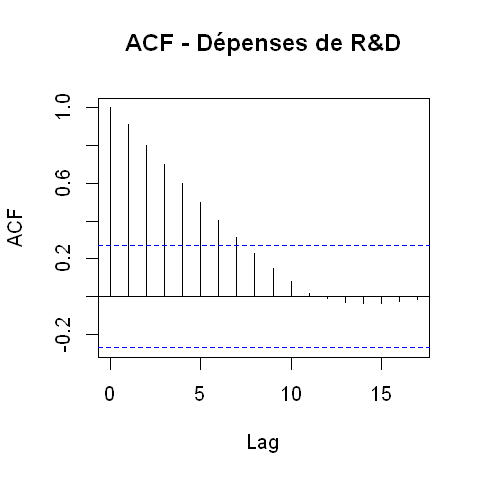

In [ ]:
acf_dépenses <- acf(data_dépenses$dépenses, main = "ACF - Dépenses de R&D")

<span style="color:blue;">**<ins>Commentaire<ins>** : Le taux de chômage aux Etats-Unis connait des grandes fluctuations sur toute la période estimée</span>

###  Autocorrélogramme partiel

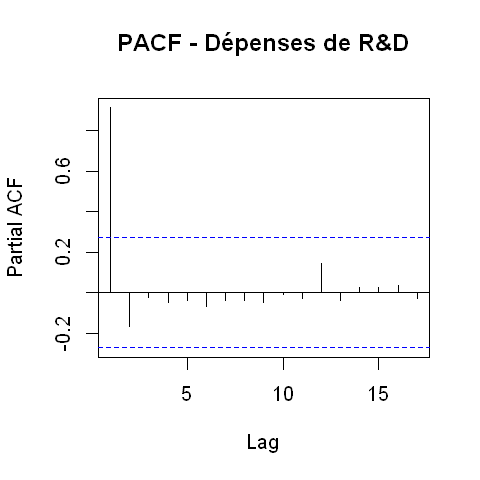

In [ ]:
pacf_dépenses <- pacf(data_dépenses$dépenses, main = "PACF - Dépenses de R&D")

<span style="color:blue;">**<ins>Commentaire<ins>** : Le taux de chômage aux Etats-Unis connait des grandes fluctuations sur toute la période estimée</span>

### 3. La productivité du travail aux Etats-Unis de 1970 à 2021

<ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour

In [ ]:
productivité$logPIB <- log(productivité)

Warning message in productivité$logPIB <- log(productivité):
"Conversion automatique de LHS en liste"

Création d'un data frame avec le chômage et les dates pour faciliter la construction du graphique.

In [ ]:
data <- data.frame(
  dates = Base$Dates,
  productivité$logPIB
)


#### Affichage du graphique

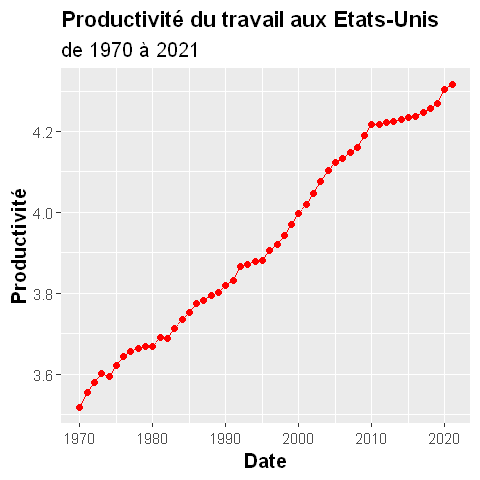

In [ ]:
p_productivité <- ggplot(data = data, aes(x = dates, y = productivité$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Productivité du travail') +
  labs(y = "Productivité", title = "Productivité du travail aux Etats-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_productivité)


### Autocorrélogramme simple

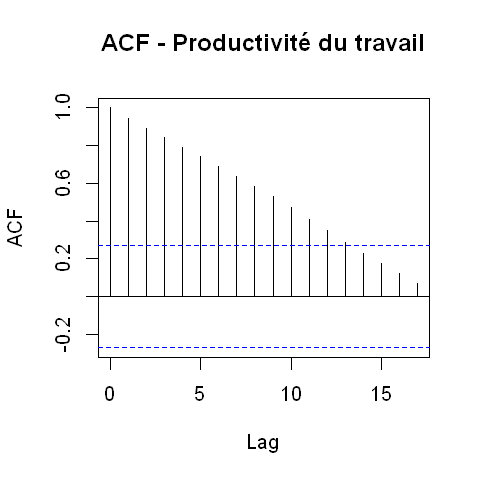

In [ ]:
acf_productivité <- acf(data_productivité$productivité, main = "ACF - Productivité du travail")

###  Autocorrélogramme partiel

In [ ]:
pacf_productivité <- pacf(data_productivité$productivité, main = "PACF - Productivité du travail")

<span style="color:blue;">**<ins>Commentaire<ins>** : Le taux de chômage aux Etats-Unis connait des grandes fluctuations sur toute la période estimée</span>

## Stratégie de test unitaire : test de Dickey-Fuller augmenté

### 1. Le chômage aux Etats-Unis entre 1970 et 2021

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

**Etape 1 : avec constante et tendance déterministe**

In [ ]:
adf1<-ur.df(y = chômage,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027859 -0.006137 -0.003183  0.004462  0.038676 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0286461  0.0099348   2.883  0.00637 **
z.lag.1     -0.3793019  0.1208865  -3.138  0.00324 **
tt          -0.0001744  0.0001471  -1.186  0.24296   
z.diff.lag   0.2620170  0.1659396   1.579  0.12242   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01138 on 39 degrees of freedom
Multiple R-squared:  0.2042,	Adjusted R-squared:  0.143 
F-statistic: 3.335 on 3 and 39 DF,  p-value: 0.02906


Value of test-statistic is: -3.1377 3.3084 4.9577 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Etape 2 : avec constante**:

In [ ]:
adf2<-ur.df(y = chômage,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Etape 3: Sans constante ni tendance déterministe**

In [ ]:
adf3<-ur.df(y = chômage,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Conclusion sur les résultats de tests ADF**

<span style="color:red;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:red;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

 ### 2. Les dépenses de R&D aux Etats-Unis de 1970 à 2021

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

**Etape 1 : avec constante et tendance déterministe**

In [ ]:
adf1<-ur.df(y = dépenses,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Etape 2 : avec constante**

In [ ]:
adf2<-ur.df(y = dépenses,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Etape 3: Sans constante ni tendance déterministe**

In [ ]:
adf3<-ur.df(y = dépenses,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Conclusion sur les résultats de tests ADF**

<span style="color:red;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:red;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

### 3. La productivité du travail aux Etats-Unis de 1970 à 2021

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

**Etape 1 : avec constante et tendance déterministe**

In [ ]:
adf1<-ur.df(y = productivité,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)

ERROR: Error in r[i1] - r[-length(r):-(length(r) - lag + 1L)]: argument non numérique pour un opérateur binaire


<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Etape 2 : avec constante**

In [ ]:
adf2<-ur.df(y = productivité,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

### 3. La productivité du travail aux Etats-Unis de 1970 à 2021

In [ ]:
adf3<-ur.df(y = dépenses,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)

<span style="color:blue;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:blue;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>

**Conclusion sur les résultats de tests ADF**

<span style="color:red;">**<ins>Commentaire<ins>** :
La statistique du test ADF est égale à $t_{\text{ADF}}=-3,138$.
Les seuils de rejet figurent sur la ligne tau3. Pour un risque de première espèce de 5% $t_{\text{ADF}}=-3,138 >-3,45$

<span style="color:red;"> On ne rejette pas l'hypothèse nulle de racine unitaire. La statistique de test est aussi supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%.</span>